In [1]:
from numpy.linalg import inv
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

from multivariate_util import multivariate_t_rvs, multivariate_t

In [2]:
size = 300

In [3]:
mean01 = np.array([0, 0])
cov01 = np.array([[1,0],[0,1]])
df01 = 10

In [4]:
sample01 = multivariate_t_rvs(mean01, cov01, df01, n=size)

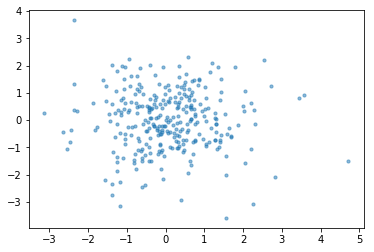

In [5]:
plt.scatter(sample01.T[0], sample01.T[1], s=10, alpha=.5)
plt.show()

In [6]:
# guesses
mu = [.5, 1]
cov = [[.5,0],[0,.5]]
# known variables
p = 2
v = df01

In [7]:
diff = []
for _ in sample01 - mu:
    diff_ = _.reshape(-1, 1)
    diff.extend( diff_.T.dot(inv(cov)).dot(diff_) )
diff = np.array(diff)

u = (v+p)/(v + diff)

u_total = u.sum()

mu = (sample01 * u).sum(axis=0) / u_total
print mu

cov = (sample01 - mu).T.dot(((sample01 - mu)*u)) / len(u)
print cov

[ 0.13591918  0.21946088]
[[ 0.69464972  0.00946903]
 [ 0.00946903  0.72128369]]


In [8]:
m = multivariate_t(mu, cov, v)

In [9]:
x1, y1 = np.mgrid[-2.5:2.5:.1, -2.5:2.5:.1]
XY = []
for xy in zip(x1, y1):
    xy = np.array(xy).T
    xy_ = []
    for _ in xy:
        xy_.append(m.pdf(_))
    XY.append(xy_)
XY = np.array(XY)

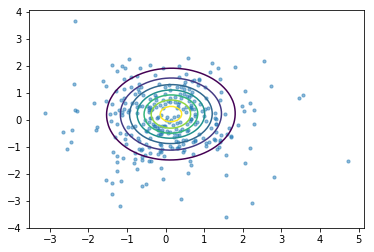

In [10]:
plt.contour(x1, y1, XY)

plt.scatter(sample01.T[0], sample01.T[1], s=10, alpha=.5)
plt.show()